# Import Modules

In [1]:
import torch
from utilis import npTorchCGPU_manula_seed, Params, Buffer, TaskEnv, RLTrainer
from RL_alg import DQLearning, ActorCritic
from architech import CNN, MLP
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"

# CartPole

In [2]:
task = {"id": "CartPole-v1"}
action_map = [0, 1]

In [6]:
params = Params(
    in_planes=None,
    planes= None,

    input_dim=4,
    hidden_dim=128,
    learning_rate=0.5e-03,
    wd=1e-04,
    gamma=0.98,
    epsilon=0.01,
    trgQ_update_freq=10,

    buffer_size=1000,
    buffer_min_size=300,
    batch_size=64,

    seed=1234,
    total_episodes=400,
    action_size=2,
    value="state",
    device=device
)

In [7]:
npTorchCGPU_manula_seed(device)
net = MLP(params.input_dim, params.action_size, params.hidden_dim, "action")
learner = DQLearning(params, net)

env_obj = TaskEnv(task, action_map, params)
buffer = Buffer(params.buffer_size, params.batch_size)

my_trainer = RLTrainer(env_obj)
my_trainer.train("off-policy", learner, buffer=buffer)

{'layers.Hidden_layer0.0.weight': [torch.Size([128, 4]), True]}
{'layers.Hidden_layer0.0.bias': [torch.Size([128]), True]}
{'layers.Hidden_layer1.0.weight': [torch.Size([128, 128]), True]}
{'layers.Hidden_layer1.0.bias': [torch.Size([128]), True]}
{'output_layer.weight': [torch.Size([2, 128]), True]}
{'output_layer.bias': [torch.Size([2]), True]}


Episodes: 100%|██████████| 400/400 [01:15<00:00,  5.29it/s]


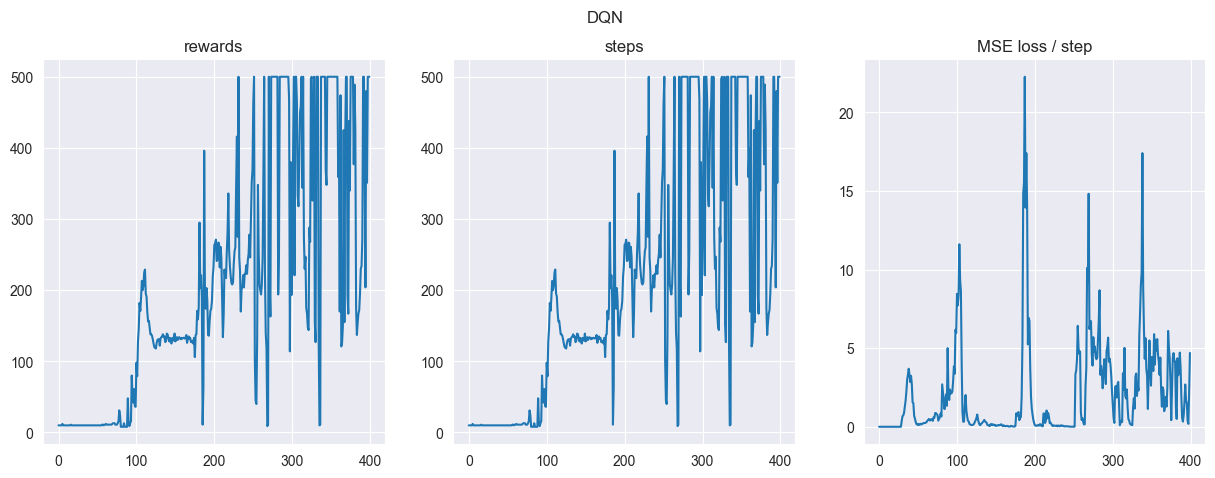

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(env_obj.episode_rewards); ax[0].set_title("rewards")
ax[1].plot(env_obj.steps); ax[1].set_title("steps")
ax[2].plot(learner.net_loss / env_obj.steps); ax[2].set_title("MSE loss / step")
fig.suptitle("DQN")
plt.show()


In [15]:
params = Params(
    in_planes=None,
    planes= None,

    input_dim=4,
    hidden_dim=128,
    learning_rate=0.3e-03,
    wd=1e-04,
    gamma=0.98,
    epsilon=0.01,
    trgQ_update_freq=50,

    buffer_size=1000,
    buffer_min_size=300,
    batch_size=64,

    seed=1234,
    total_episodes=1500,
    action_size=2,
    value="state",
    device=device
)

In [16]:
npTorchCGPU_manula_seed(device)
net_actor = MLP(params.input_dim, params.action_size, params.hidden_dim, "action")
net_critic = MLP(params.input_dim, params.action_size, params.hidden_dim, "state")
learner = ActorCritic(params, net_actor, net_critic)

env_obj = TaskEnv(task, action_map, params)
buffer = Buffer(params.buffer_size, params.batch_size)

my_trainer = RLTrainer(env_obj)
my_trainer.train("on-policy", learner)

{'layers.Hidden_layer0.0.weight': [torch.Size([128, 4]), True]}
{'layers.Hidden_layer0.0.bias': [torch.Size([128]), True]}
{'layers.Hidden_layer1.0.weight': [torch.Size([128, 128]), True]}
{'layers.Hidden_layer1.0.bias': [torch.Size([128]), True]}
{'output_layer.weight': [torch.Size([2, 128]), True]}
{'output_layer.bias': [torch.Size([2]), True]}
{'layers.Hidden_layer0.0.weight': [torch.Size([128, 4]), True]}
{'layers.Hidden_layer0.0.bias': [torch.Size([128]), True]}
{'layers.Hidden_layer1.0.weight': [torch.Size([128, 128]), True]}
{'layers.Hidden_layer1.0.bias': [torch.Size([128]), True]}
{'output_layer.weight': [torch.Size([1, 128]), True]}
{'output_layer.bias': [torch.Size([1]), True]}


Episodes: 100%|██████████| 1500/1500 [00:18<00:00, 81.75it/s]


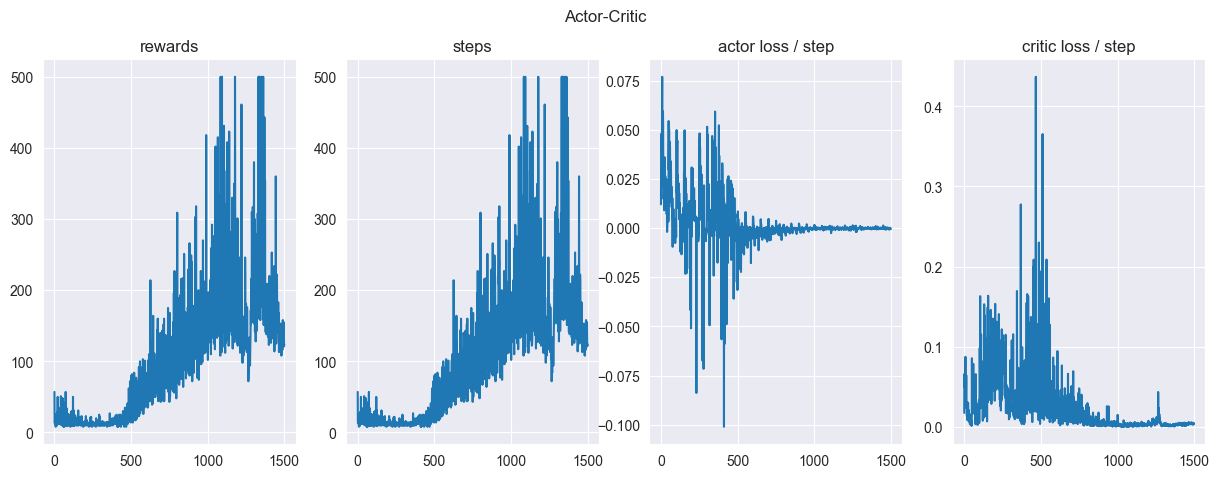

In [17]:
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
ax[0].plot(env_obj.episode_rewards); ax[0].set_title("rewards")
ax[1].plot(env_obj.steps); ax[1].set_title("steps")
ax[2].plot(learner.actor_net_loss / env_obj.steps); ax[2].set_title("actor loss / step")
ax[3].plot(learner.critic_net_loss / env_obj.steps); ax[3].set_title("critic loss / step")
fig.suptitle("Actor-Critic")
plt.show()
